In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
current_dir = os.getcwd()
targer_dir = os.path.abspath(os.path.join(current_dir, ".."))
file_path = os.path.join(targer_dir,"data_saham.csv")

In [3]:
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])

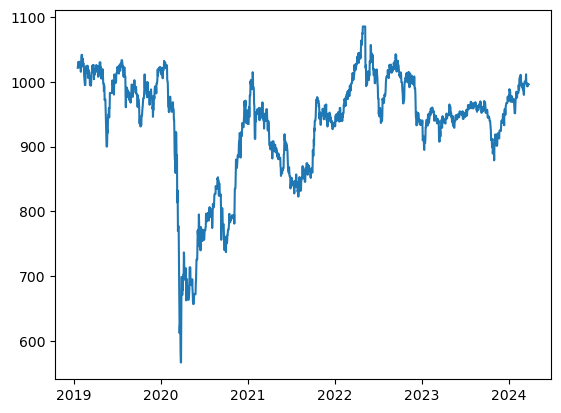

In [4]:
import matplotlib.pyplot as plt

plt.plot(data['Date'], data['Target'])

In [5]:
forecast_days = 30
data.rename(columns={'Target':'Price'}, inplace=True)
df = pd.concat([data['Date'], data['Price']], axis=1)
df = df.set_index('Date')
df['Forecast'] = np.nan
df.head()

,Price,Forecast
Date,,
2019-01-16,1021.60,NaN
2019-01-17,1024.91,NaN
2019-01-18,1030.69,NaN
2019-01-19,1030.69,NaN
2019-01-20,1030.69,NaN


<Axes: ylabel='Density'>

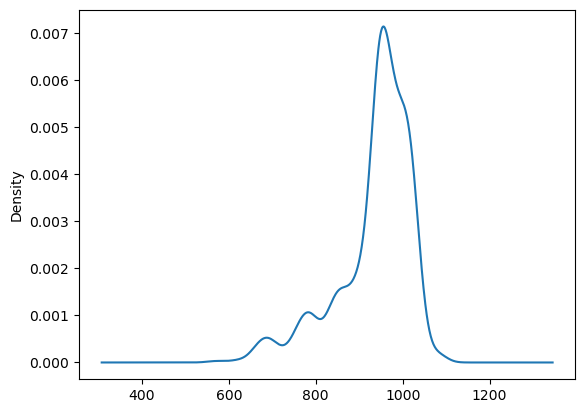

In [6]:
df_Price = data['Price']
df_Price.plot(kind='kde')

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13688.930, Time=1.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13697.458, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13699.284, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13699.268, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13695.462, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13695.029, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13694.968, Time=0.41 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=13697.239, Time=1.11 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=13697.049, Time=1.20 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13695.374, Time=0.60 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=13696.887, Time=0.57 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=13696.847, Time=0.93 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=13692.478, Time=2.95 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=13686.935, Time=0.82 sec
 ARIMA(1,1,2)(0,0,0

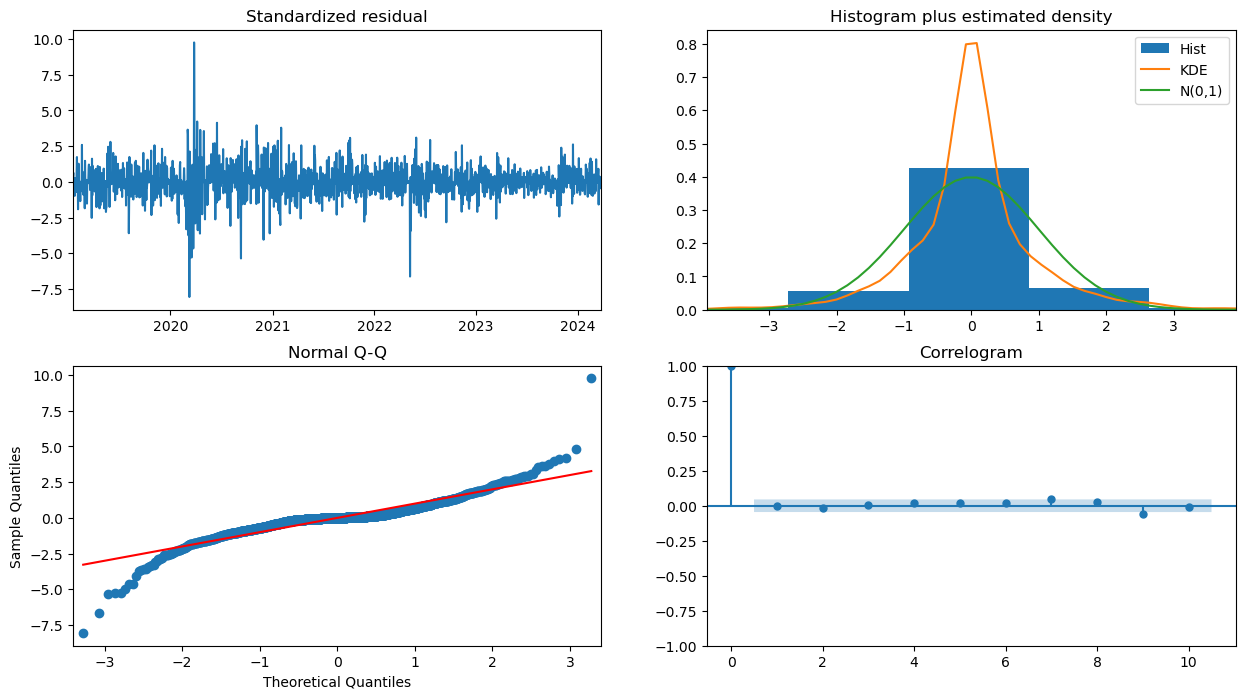

In [7]:
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt

best_model = auto_arima(df['Price'], seasonal=False, trace=True)
print(best_model.summary())

model_autoARIMA = best_model

model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()


In [8]:
# Separate in Train and Test Dfs
train_size = int(len(df_Price) * 0.8)
train_df, test_df = df_Price.iloc[:train_size], df_Price.iloc[train_size:]

In [9]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
def arima_forecast(history):
    # Fit the ARIMA model
    model = ARIMA(history, order=(2,1,2))
    model_fit = model.fit()
    
    # Make the prediction
    output = model_fit.forecast()
    yhat = output[0]
    return yhat

# Split data into train and test sets
price_data = data['Price'] 
X = price_data.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]

# Walk-forward validation
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    # Generate a prediction
    yhat = arima_forecast(history)
    predictions.append(yhat)
    # Add the observed value to the training set for the next iteration
    obs = test[t]
    history.append(obs)


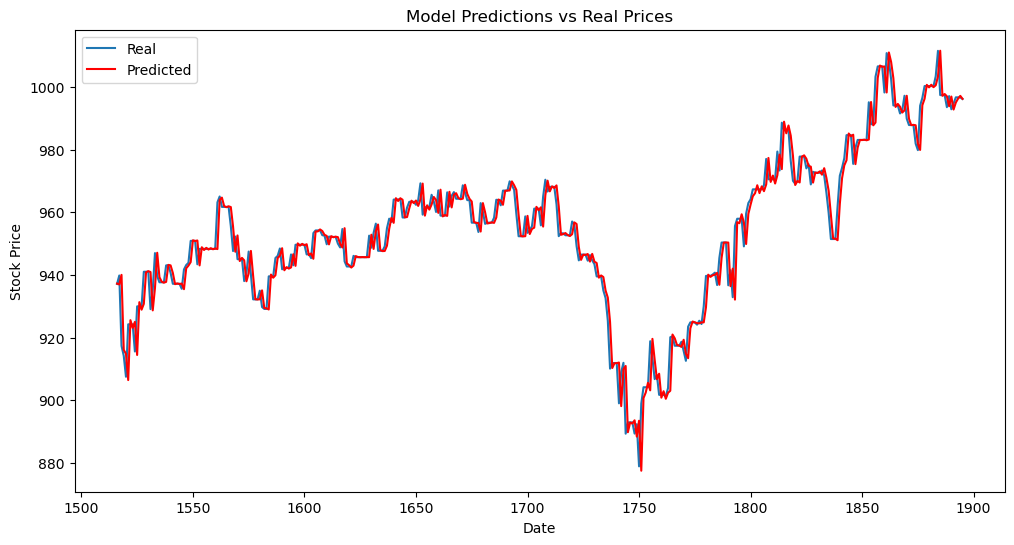

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test_df.index, test_df, label='Real')
plt.plot(test_df.index, predictions, color='red', label='Predicted')
plt.title('Model Predictions vs Real Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
mae = mean_absolute_error(test_df,predictions)
mse = mean_squared_error(test_df,predictions)
r2score = r2_score(test_df,predictions)
print("mae = ", mae)
print("mse = ", mse)
print("r2_score = ", r2score)

mae =  3.4359757706718788
mse =  29.52783482469621
r2_score =  0.9517650699798678


In [12]:
history = test_df[-30:].values.flatten()
forecasting = []

for t in range(30):
    yhat = arima_forecast(history)
    history = np.append(history, yhat)
    forecasting.append(yhat)

forecasting = np.array(forecasting)
print(forecasting)


c:\Users\untu0\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\untu0\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\untu0\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[995.41750679 995.82814722 995.21359152 995.60730843 995.12367504
 995.4787529  995.09121169 995.40055196 995.08639785 995.35035762
 995.09410816 995.31595114 995.1063835  995.29121381 995.11974768
 995.27267961 995.13247991 995.25829209 995.14389234 995.2469257
 995.15373281 995.2377858  995.16208265 995.23040143 995.16906359
 995.22440994 995.17485204 995.21957383 995.17962824 995.21561151]


In [14]:
temp = df.reset_index()
# print(temp)
dates_test = temp["Date"]
dates_test = dates_test[-380:]

In [15]:
import datetime
next_30_dates = []
last_time = dates_test[-1:]
time_change = datetime.timedelta(days = 1) 
new_time = last_time + time_change 
for i in range(30):
    time_change = datetime.timedelta(days = i) 
    new_time = last_time + time_change 
    next_30_dates.append(new_time)
dates_test = pd.concat([dates_test] + next_30_dates)
print(dates_test)


1516   2023-03-12
1517   2023-03-13
1518   2023-03-14
1519   2023-03-15
1520   2023-03-16
          ...    
1895   2024-04-19
1895   2024-04-20
1895   2024-04-21
1895   2024-04-22
1895   2024-04-23
Name: Date, Length: 410, dtype: datetime64[ns]


In [16]:
target_length = len(dates_test)
y_test = np.append(test_df.values.flatten(), [np.nan] * (target_length - len(test_df)))
y_pred = np.append(predictions, [np.nan] * (target_length - len(predictions)))
forecast = np.concatenate(([np.nan] * (target_length - len(forecasting)), forecasting))

# dates_test = dates_test.ravel()
y_test = y_test.ravel()
y_pred = y_pred.ravel()
forecast = forecast.ravel()

new_dataframe = pd.DataFrame({
    'Date': dates_test,
    'Actual': y_test,
    'Predicted': y_pred,
    'Forecasting': forecast
})

forecast_data = new_dataframe.set_index('Date')

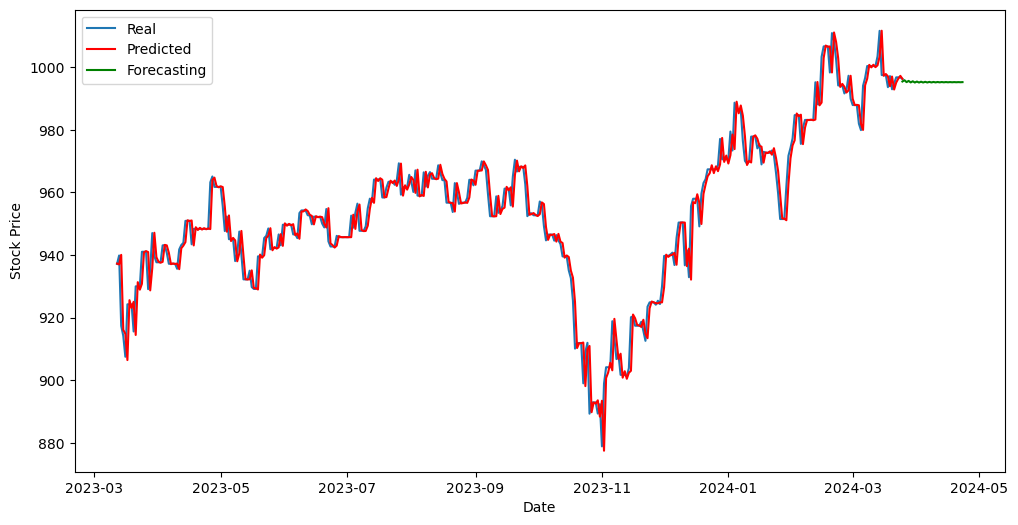

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(forecast_data['Actual'], label='Real')
plt.plot(forecast_data['Predicted'], color='red', label='Predicted')
plt.plot(forecast_data['Forecasting'], color='green', label='Forecasting')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
